# Lab 6 - Data Visualization with Seaborn

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [43]:
week3 = pd.read_csv("nfloffenseweek3.csv")
week4 = pd.read_csv("nfloffenseweek4.csv")
week5 = pd.read_csv("nfloffenseweek5.csv")
week6 = pd.read_csv("nfloffenseweek6.csv")
week7 = pd.read_csv("nfloffenseweek7.csv")
df_teams = pd.read_csv("nfl_teams.csv")

In [44]:
week3.insert(loc=2,column='week',value=3)
week4.insert(loc=2,column='week',value=4)
week5.insert(loc=2,column='week',value=5)
week6.insert(loc=2,column='week',value=6)
week7.insert(loc=2,column='week',value=7)

## NFL Offense Data

1. Import the NFL week 3-7 data and add a week column to dataset and set the value to the given week (e.g. 3 )for all rows from that week. Combine the weekly dataframes by adding the dataframes together row-wise. Next, merge the division and abbreviation data to this dataframe so that the division and conference info is included (using  team_colors_logos.csv or nfl_teams.csv).

In [67]:
df.columns = ['rank', 'team', 'week', 'games', 'points_scored', 'total_yards',
       'offensive_plays', 'yards_per_play', 'turnovers_lost', 'fumbles_lost',
       'first_downs', 'passes_completed', 'passes_attempted', 'passing_yards',
       'passing_touchdowns', 'passing_interceptions',
       'net_yards_per_pass_attempt', 'passing_first_downs', 'rushing_attempts',
       'rushing_yards', 'rushing_touchdowns', 'rushing_yards_per_attempt',
       'rushing_first_downs', 'penalties', 'penalty_yards', 'first_down_penalties',
       'percentage_scoring_drives', 'percentage_turnover_drives',
       'expected_points', 'ID', 'Abbreviation', 'Conference', 'Division']

In [68]:
week_files = [week3,week4,week5,week6,week7]
df = pd.concat(week_files)

df = df.merge(df_teams, how='left',on="team")
df

,rank,team,week,games,points_scored,total_yards,offensive_plays,yards_per_play,turnovers_lost,fumbles_lost,...,penalties,penalty_yards,1st_down_penalties,percentage_scoring_drives,percentage_turnover_drives,expected_points,ID,Abbreviation,Conference,Division
0,1,Baltimore Ravens,3,3,99,1141,166,6.9,3,1,...,8,44,5,42.9,8.6,35.63,3.0,BAL,AFC,North
1,2,Detroit Lions,3,3,95,1227,203,6.0,2,0,...,15,129,5,40.5,5.4,31.05,11.0,DET,NFC,North
2,3,Buffalo Bills,3,3,91,1324,213,6.2,5,3,...,20,136,6,46.7,16.7,47.46,4.0,BUF,AFC,East
3,4,Kansas City Chiefs,3,3,88,1122,180,6.2,3,2,...,15,124,8,45.2,6.5,40.73,16.0,KC,AFC,West
4,5,Philadelphia Eagles,3,3,86,1341,208,6.4,1,0,...,23,173,6,39.4,3.0,45.06,24.0,PHI,NFC,East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155,28,Indianapolis Colts,7,7,113,2391,481,5.0,14,5,...,42,347,9,30.3,18.4,-24.15,14.0,IND,AFC,South
156,29,Pittsburgh Steelers,7,7,107,2090,436,4.8,12,3,...,42,298,8,26.9,12.8,-29.12,25.0,PIT,AFC,North
157,30,Houston Texans,7,6,106,1860,358,5.2,6,1,...,33,265,13,32.8,9.0,-9.67,13.0,HOU,AFC,South
158,31,Los Angeles Rams,7,6,104,1859,375,5.0,13,5,...,24,205,9,32.3,21.0,-15.68,29.0,LAR,NFC,West


2. Plot the average number of points scored each week for each team on a horizontal bar chart (with teams on the vertical axis and points on the horizontal axis). Add the points scored for each bar. (Hint: check out `plt.bar_label()`)

In [158]:
answer = df.groupby('team').points_scored.mean()
answer

team
Arizona Cardinals        105.0
Atlanta Falcons          122.0
Baltimore Ravens         139.0
Buffalo Bills            141.8
Carolina Panthers         92.0
Chicago Bears             84.2
Cincinnati Bengals       114.8
Cleveland Browns         127.8
Dallas Cowboys            90.8
Denver Broncos            75.0
Detroit Lions            132.2
Green Bay Packers         91.0
Houston Texans            80.0
Indianapolis Colts        76.4
Jacksonville Jaguars     118.6
Kansas City Chiefs       155.6
Las Vegas Raiders        114.6
Los Angeles Chargers     115.4
Los Angeles Rams          83.8
Miami Dolphins           114.8
Minnesota Vikings        107.4
New England Patriots     104.6
New Orleans Saints       111.6
New York Giants          102.4
New York Jets            109.2
Philadelphia Eagles      131.6
Pittsburgh Steelers       81.8
San Francisco 49ers       98.6
Seattle Seahawks         119.6
Tampa Bay Buccaneers      96.2
Tennessee Titans          86.6
Washington Commanders     90.6
Nam

<function matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, *, loc=None, **kwargs)>

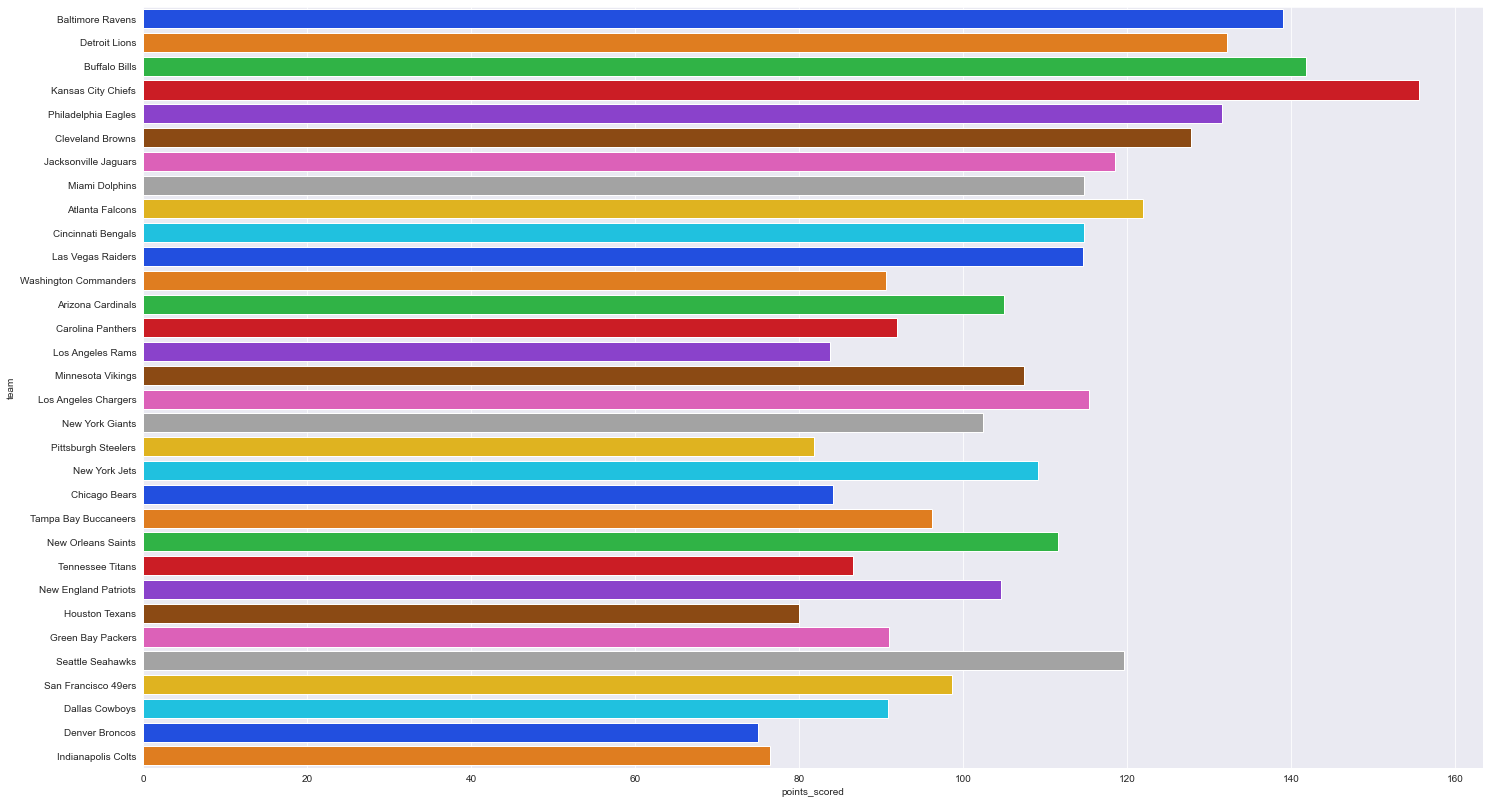

In [157]:
answer = df.groupby('team').points_scored.mean()
answer

plt.figure(figsize=(24, 14))
sns.set_style('darkgrid')
sns.barplot(
    y= df.team,
    x= df.points_scored,
    palette= 'bright',
    ci=None
)

plt.xlabel

3. Plot the average passing yards and average rushing yards for each team as a stacked bar chart.

C:\Users\kodom\AppData\Local\Temp\ipykernel_8000\2824963299.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  avg_pass_rush = df.groupby('team')['passing_yards','rushing_yards'].mean()


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1440x1080 with 0 Axes>

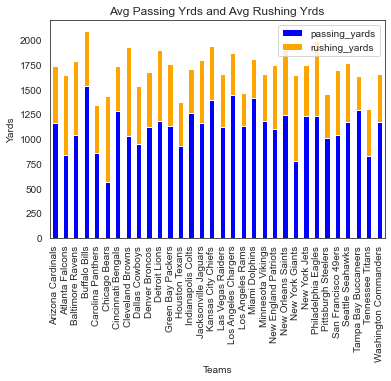

In [104]:
avg_pass_rush = df.groupby('team')['passing_yards','rushing_yards'].mean()
avg_pass_rush

plt.figure(figsize=(20,15))
#sns.set_style('white')
avg_pass_rush.plot(kind='bar', stacked=True, color=['blue','orange'])
plt.title("Avg Passing Yrds and Avg Rushing Yrds")
plt.xlabel("Teams")
plt.ylabel("Yards")
#bar1 = sns.barplot(x=avg_pass, y=df.team, color='red')
#bar2 = sns.barplot(x=avg_rush, y=df.team, color='purple')
plt.show

4. Plot the average total yards vs average first downs for each team on a scatter plot (with first downs on the x axis and total yards on the y axis).

Text(0.5, 1.0, 'Avg Total Yards vs. Avg First Downs')

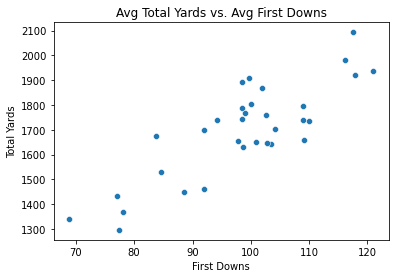

In [65]:
avg_yar = df.groupby('team').total_yards.mean()
avg_fd = df.groupby('team').first_downs.mean()

sns.scatterplot(
    x=avg_fd,
    y=avg_yar,
)
plt.xlabel("First Downs")
plt.ylabel("Total Yards")
plt.title("Avg Total Yards vs. Avg First Downs")

5. Plot the penalty yards for the Balitmore Ravens and the LA Rams for each week as a line chart (with week on the x-axis and penalty yards on the y-axis).

Text(0, 0.5, 'Penalty Yards')

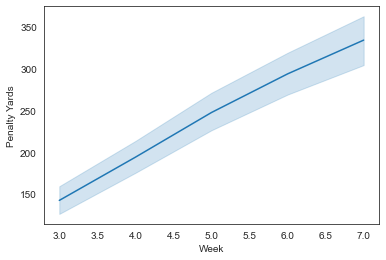

In [106]:
sns.lineplot(
    x=df.week,
    y=df.penalty_yards
)

plt.xlabel("Week")
plt.ylabel("Penalty Yards")

6. Plot the average total points vs average yards per play for each team as a scatter plot (with total points on the y-axis and yards per play on the x-axis).

Text(0.5, 1.0, 'Avg Total Points vs. Avg Yards Per Play')

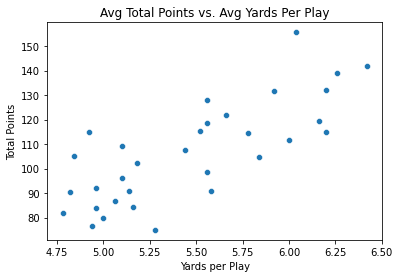

In [70]:
tot_pt = df.groupby('team').points_scored.mean()
avg_yer_per = df.groupby('team').yards_per_play.mean()
sns.scatterplot(
    x= avg_yer_per,
    y= tot_pt
)
plt.xlabel("Yards per Play")
plt.ylabel("Total Points")
plt.title("Avg Total Points vs. Avg Yards Per Play")

7. Plot the number of penalty yards for each team in the NFC West for each week on bar chart.

In [143]:
sort = df[(df.Conference == 'NFC') & (df.Division == 'West')]
sort
week_sort = sort.groupby('team').penalty_yards.sum()
week_sort

team
Arizona Cardinals      1510
Los Angeles Rams        823
San Francisco 49ers    1215
Seattle Seahawks       1865
Name: penalty_yards, dtype: int64

Text(0, 0.5, 'Penalty Yards')

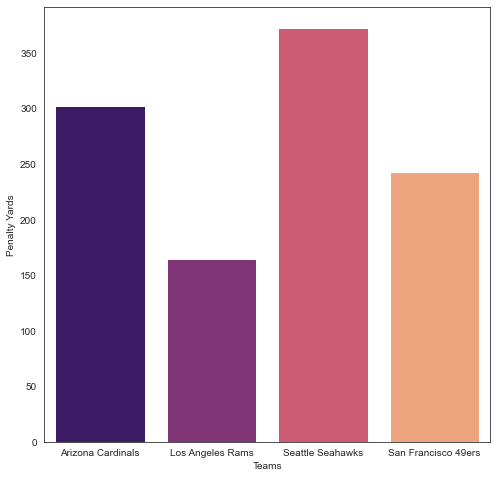

In [155]:
sort = df[(df.Conference == 'NFC') & (df.Division == 'West')]
sort
#week_sort = sort.groupby('team').penalty_yards.sum()
#week_sort
plt.figure(figsize=(8,8))
sns.barplot(
    x= df[(df.Conference == 'NFC') & (df.Division == 'West')].team,
    y= df.penalty_yards,
    palette="magma",
    ci=None
)

plt.xlabel("Teams")
plt.ylabel("Penalty Yards")


8. Plot the average number of weekly points per (conference and division) on a horizontal bar chart. (There will be 8 bars.)

In [ ]:
#seperate by conference and division